In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import scipy
from scipy import stats

from sklearn.ensemble import VotingClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#importing the dataset
data = pd.read_excel(r'C:\Users\Lenovo\Documents\Customer Churn Prediction\customer_churn_large_dataset.xlsx')

In [34]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [35]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [36]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<AxesSubplot:>

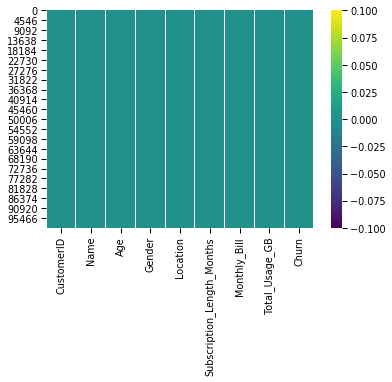

In [37]:
sns.heatmap(data.isnull(),cmap = 'viridis')

In [38]:
data.groupby('Location').mean('Subscription_Length_Months')

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Location,,,,,,
Chicago,49962.013979,44.212697,12.520443,64.819357,274.278134,0.498296
Houston,49920.619785,44.081609,12.464702,65.127926,273.838865,0.491095
Los Angeles,50144.702859,43.875306,12.473030,65.192377,273.986727,0.492989
Miami,50093.782387,44.059957,12.566322,64.951278,274.737756,0.503020
New York,49880.363751,43.904608,12.425579,65.174980,275.138142,0.503659


In [39]:
data.groupby('Gender').mean('Subscription_Length_Months')

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Gender,,,,,,
Female,50004.256552,44.014358,12.487892,65.008096,274.573622,0.496734
Male,49996.710851,44.039792,12.492327,65.098689,274.212116,0.498855


<AxesSubplot:xlabel='Churn', ylabel='count'>

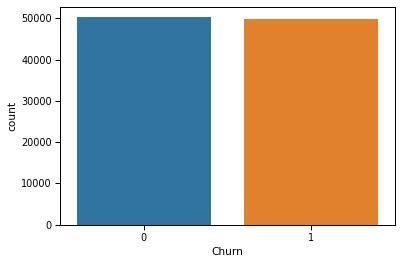

In [40]:
sns.countplot(data=data, x='Churn')

In [41]:
data.Churn[data.Churn == 0].groupby(by = data.Gender).count()

Gender
Female    25272
Male      24949
Name: Churn, dtype: int64

In [42]:
data.Churn[data.Churn == 1].groupby(by = data.Gender).count()

Gender
Female    24944
Male      24835
Name: Churn, dtype: int64

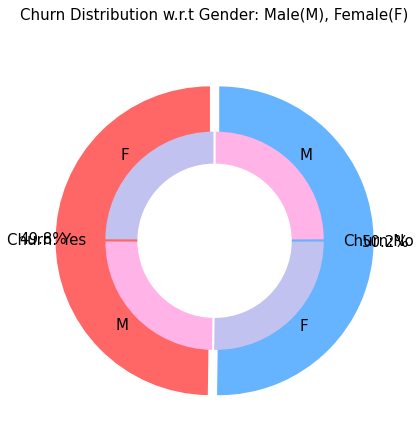

In [4]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [49779,50221]
labels_gender = ["F","M","F","M"]
sizes_gender = [24944,24835 ,25272,24949]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

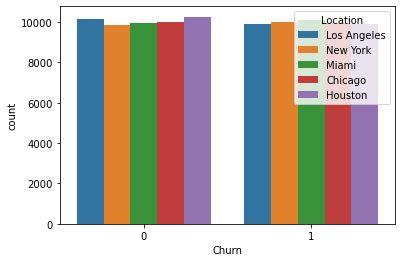

In [9]:
sns.countplot(data=data,x='Churn',hue='Location')

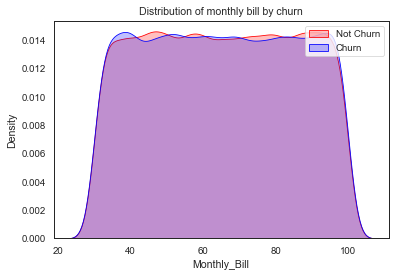

In [55]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.Monthly_Bill[(data["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(data.Monthly_Bill[(data["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly_Bill');
ax.set_title('Distribution of monthly bill by churn');

In [10]:
fig = px.box(data, x='Churn', y = 'Subscription_Length_Months')

# Update yaxis properties
fig.update_yaxes(title_text='Subscription_Length_Months', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Suscription Duration vs Churn</b>',
)

fig.show()

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

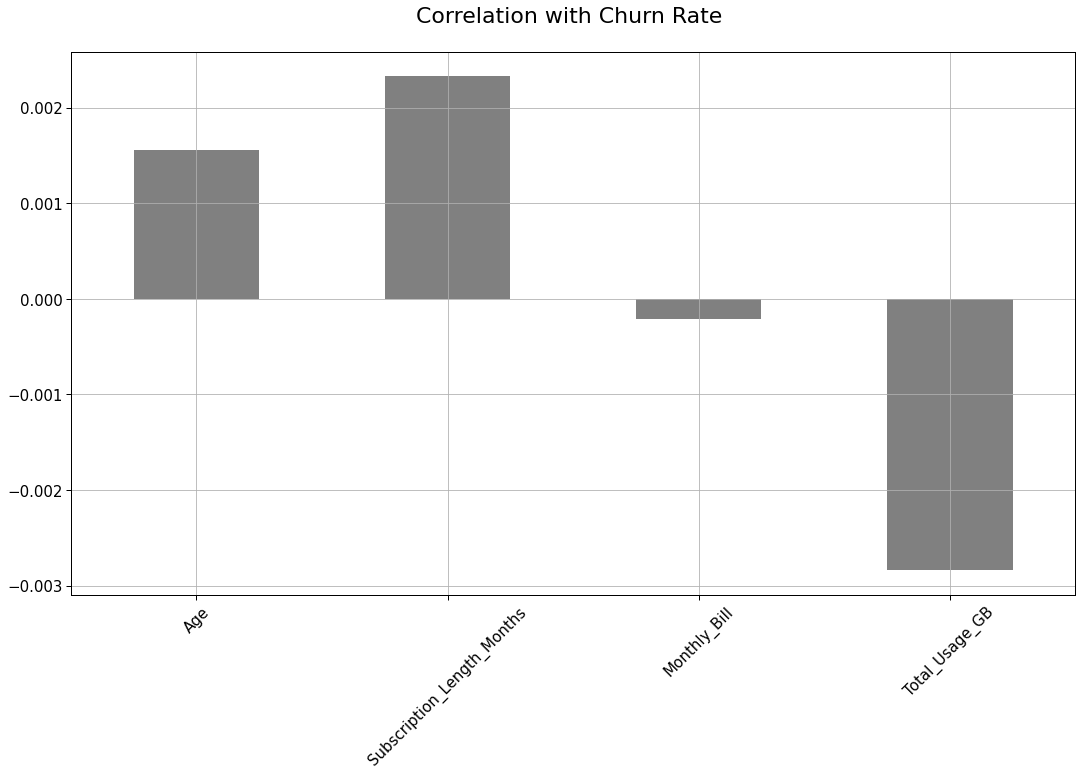

In [47]:
data2 = data[['Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']]

correlations = data2.corrwith(data.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'grey',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

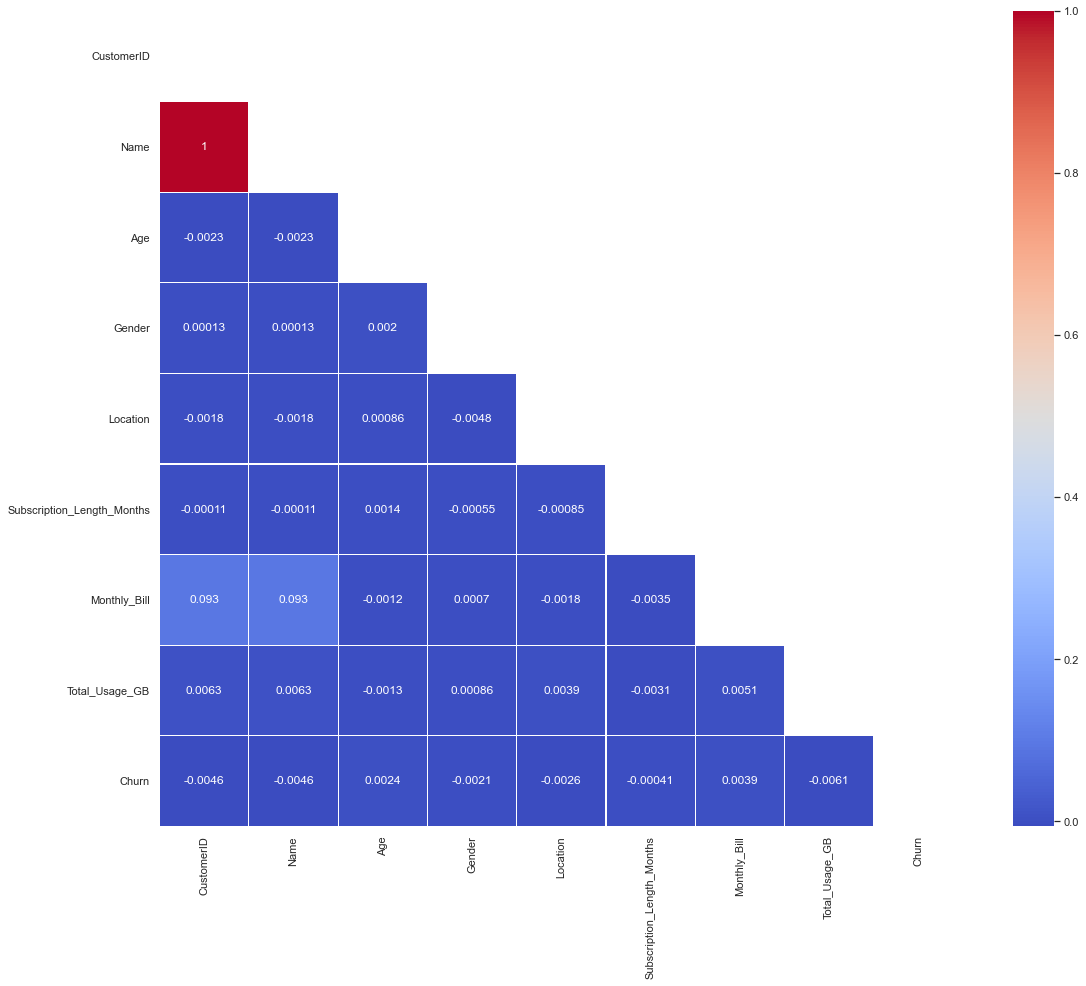

In [48]:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm')

In [49]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = data.apply(lambda x: encode_data(x))
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,0,63,1,2,17,73.36,236,0
1,2,11112,62,0,4,1,48.76,172,0
2,3,22223,24,0,2,5,85.47,460,0
3,4,33334,36,0,3,3,97.94,297,1
4,5,44445,46,0,3,19,58.14,266,0


In [51]:
data.drop(['CustomerID','Name'],axis=1,inplace=True)

In [52]:
data['Monthly_Bill'] = stats.zscore(data['Monthly_Bill'])
data['Subscription_Length_Months'] = stats.zscore(data['Subscription_Length_Months'])
data['Total_Usage_GB'] = stats.zscore(data['Total_Usage_GB'])
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,0.651115,0.410606,-0.294289,0
1,62,0,4,-1.658879,-0.805374,-0.784852,0
2,24,0,2,-1.081380,1.009204,1.422681,0
3,36,0,3,-1.370129,1.625597,0.173279,1
4,46,0,3,0.939864,-0.341720,-0.064338,0
...,...,...,...,...,...,...,...
99995,33,1,1,1.517363,-0.490504,-0.370939,1
99996,62,0,4,0.939864,-0.168220,0.587191,0
99997,64,1,0,0.651115,1.535140,-0.179313,1
99998,51,0,4,1.084239,-0.781153,1.223390,1


In [53]:
data['Age'] = stats.zscore(data['Age'])

In [54]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.241670,1,2,0.651115,0.410606,-0.294289,0
1,1.176226,0,4,-1.658879,-0.805374,-0.784852,0
2,-1.310651,0,2,-1.081380,1.009204,1.422681,0
3,-0.525321,0,3,-1.370129,1.625597,0.173279,1
4,0.129120,0,3,0.939864,-0.341720,-0.064338,0


In [55]:
X = data.drop(['Churn'],axis = 1)
y = data['Churn']

In [56]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [57]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
pred_log = log_model.predict(X_test)

In [58]:
#printing the metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_log))
print(confusion_matrix(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55     15100
           1       0.49      0.38      0.43     14900

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000

[[9188 5912]
 [9170 5730]]


In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dt = dtree.predict(X_test)

In [60]:
#lets check metrics
print(classification_report(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15100
           1       0.50      0.50      0.50     14900

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

[[7594 7506]
 [7514 7386]]


In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [62]:
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51     15100
           1       0.50      0.49      0.49     14900

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

[[7688 7412]
 [7614 7286]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define your Random Forest model
rf_classifier = RandomForestClassifier()

# Define a dictionary of hyperparameters and their possible values to search through
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be a leaf node
}

# Create a GridSearchCV object with the classifier, parameter grid, and cross-validation settings
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Print the best hyperparameters and their corresponding performance score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Optionally, you can access the best trained model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

In [64]:
# Create an XGBoost classifier
clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

pred_clf = clf.predict(X_test)
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))


              precision    recall  f1-score   support

           0       0.50      0.58      0.54     15100
           1       0.50      0.42      0.46     14900

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

[[8705 6395]
 [8603 6297]]


In [65]:
# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

pred_clf = clf.predict(X_test)
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53     15100
           1       0.50      0.43      0.46     14900

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

[[8591 6509]
 [8484 6416]]


In [73]:
# Create a KNeighborsClassifier with k=3 (you can choose any value for k)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

pred_clf = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15100
           1       0.50      0.50      0.50     14900

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

[[7554 7546]
 [7453 7447]]


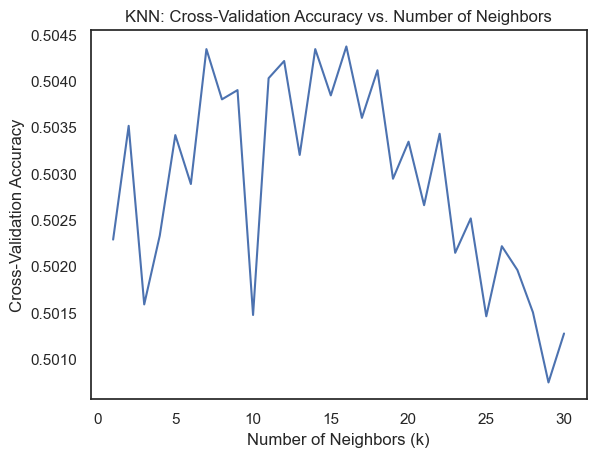

The optimal number of neighbors is: 16


In [74]:
# Initialize lists to store cross-validation scores
cv_scores = []

# Define a range of k values to test
k_values = list(range(1, 31))

# Perform k-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k (the one with the highest cross-validation score)
optimal_k = k_values[cv_scores.index(max(cv_scores))]

# Plot the cross-validation scores for different k values
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Cross-Validation Accuracy vs. Number of Neighbors')
plt.show()

# Print the optimal k value
print("The optimal number of neighbors is:", optimal_k)


In [70]:
classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [71]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [72]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
7000/7000 [==============================] - 18s 2ms/step - loss: 0.6932 - accuracy: 0.4982
Epoch 2/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5033
Epoch 3/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.4977
Epoch 4/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 6/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5021
Epoch 7/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5016
Epoch 8/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.4998
Epoch 9/100
7000/7000 [==============================] - 18s 3ms/step - loss: 0.6932 - accuracy: 0.4963
Epoch 10/100
7000/7000 [==============================] - 17s 2m

7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 80/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 81/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.4982
Epoch 82/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.4972
Epoch 83/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.4994
Epoch 84/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5004
Epoch 85/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 86/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.5012
Epoch 87/100
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.4990
Epoch 88/100
7000/7000 [==============================] - 17s 2ms/st